C:\Users\sagni\AppData\Local\Temp\ipykernel_14628\597278627.py:11: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


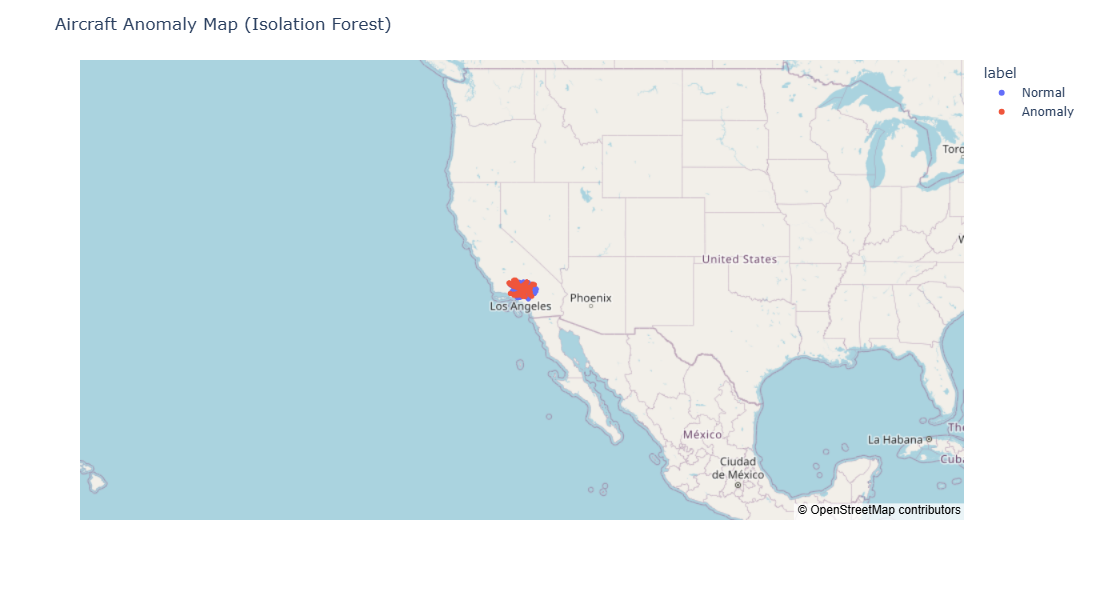

In [1]:
import pandas as pd
import plotly.express as px

# Load results
df = pd.read_csv(r"C:\Users\sagni\Downloads\Spacepath Debris Detection\anomaly_results.csv")

# Filter anomalies
df['label'] = df['is_anomaly'].map({0: 'Normal', 1: 'Anomaly'})

# Plot with Plotly
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="long",
    color="label",
    hover_data=["flight", "alt", "mph"],
    zoom=3,
    height=600
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Aircraft Anomaly Map (Isolation Forest)")
fig.show()


In [2]:
import pandas as pd
import joblib

# Load saved model and scaler
model = joblib.load(r"C:\Users\sagni\Downloads\Spacepath Debris Detection\isolation_forest_model.pkl")
scaler = joblib.load(r"C:\Users\sagni\Downloads\Spacepath Debris Detection\scaler.pkl")

# Load new data (replace this with a new file or real-time stream later)
new_df = pd.read_csv(r"C:\Users\sagni\Downloads\Spacepath Debris Detection\aircraft-data_nov_dec.csv")
features = ['alt', 'mph', 'lat', 'long']
new_df = new_df.dropna(subset=features)

# Predict
X_new = scaler.transform(new_df[features])
new_df['is_anomaly'] = model.predict(X_new)
new_df['is_anomaly'] = new_df['is_anomaly'].map({1: 0, -1: 1})

print(new_df[['flight', 'alt', 'mph', 'is_anomaly']].head())


    flight    alt  mph  is_anomaly
0   SIS300  20175  474           0
1  UAL1434  36700  523           0
2  SWA3287  13225  380           0
3  AAL2059  33750  527           0
4    N84PJ  34725  525           0
